## Visualising data on unstructured grids

In this example, we will explore different methods of visualising unstructured grid data.

In [1]:
import earthkit.plots

import numpy as np
import cartopy.crs as ccrs
from scipy.interpolate import griddata

First, let's generate a sample set of random (unstructured) points.

In [2]:
# Example data (unstructured points)
points = np.random.rand(500, 2) * 10  # 500 random points
values = np.sin(points[:, 0]) + np.cos(points[:, 1])  # Some sample data

x = points[:, 0]
y = points[:, 1]

Next, let's generate a diverging colour palette for visualising this data.

In [3]:
style = earthkit.plots.styles.Style(
    levels=np.arange(-2, 2.1, 0.25),
    colors="Spectral_r",
)

The most straightforward way to visualise this data is as a scatter plot, which simply shows the unstructured points, coloured according to their value.

/Users/mavj/ek-plots-tests/earthkit-plots/src/earthkit/plots/metadata/labels.py:121: UserWarning: No key "variable_name" found in layer metadata.
  warnings.warn(f'No key "{attr}" found in layer metadata.')
/Users/mavj/ek-plots-tests/earthkit-plots/src/earthkit/plots/metadata/labels.py:121: UserWarning: No key "units" found in layer metadata.
  warnings.warn(f'No key "{attr}" found in layer metadata.')


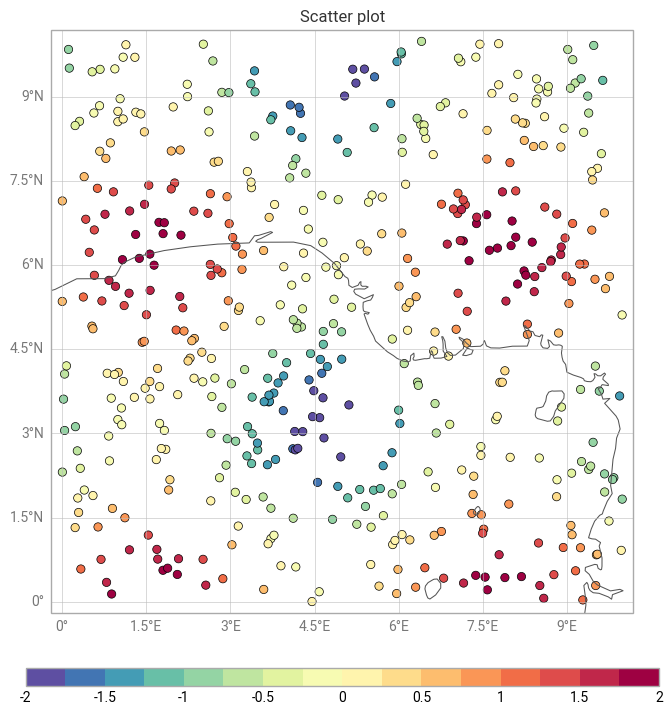

In [4]:
chart = earthkit.plots.Map()

chart.scatter(x=x, y=y, z=values, style=style)
chart.legend()

chart.coastlines()
chart.gridlines()

chart.title("Scatter plot")

chart.show()

It's also possible to plot this data with the `contourf` method, like any regular gridded data. Under the hood, earthkit will interpolate your unstructured data onto a regular grid in your *target coordinate reference system*, using the interpolation method of your choice (linear (default), nearest neighbour or cubic).

/Users/mavj/ek-plots-tests/earthkit-plots/src/earthkit/plots/components/subplots.py:421: UserWarning: The 'interpolation_method' argument is only valid for unstructured data.
  warnings.warn(
/Users/mavj/ek-plots-tests/earthkit-plots/src/earthkit/plots/metadata/labels.py:121: UserWarning: No key "variable_name" found in layer metadata.
  warnings.warn(f'No key "{attr}" found in layer metadata.')
/Users/mavj/ek-plots-tests/earthkit-plots/src/earthkit/plots/metadata/labels.py:121: UserWarning: No key "units" found in layer metadata.
  warnings.warn(f'No key "{attr}" found in layer metadata.')


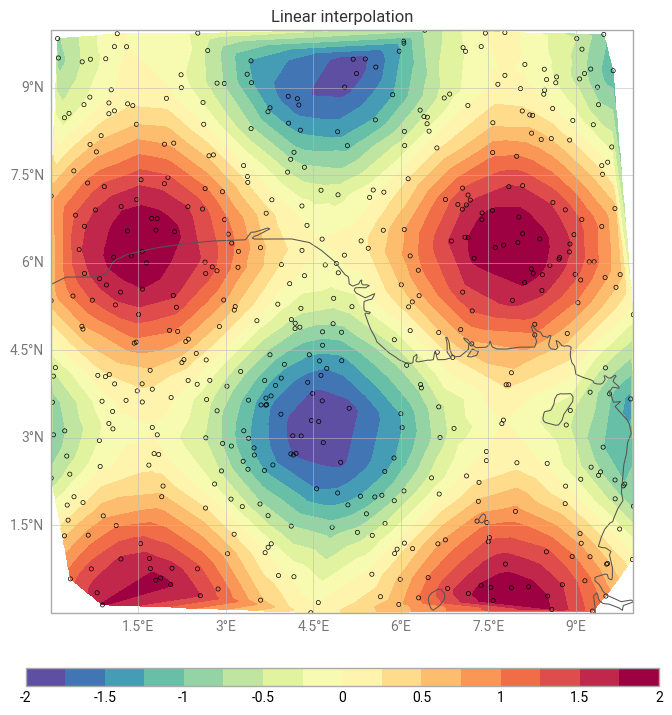

In [5]:
chart = earthkit.plots.Map()

chart.contourf(x=x, y=y, z=values, style=style, interpolation_method="linear")
chart.legend()

chart.scatter(x=points[:, 0], y=points[:, 1], color="none", marker=".")

chart.coastlines()
chart.gridlines()

chart.title("Linear interpolation")

chart.show()

Alternatively, you could use the `tricontourf` method to draw contour regions given a provided triangulation method (Delauney triangulation by default).

/Users/mavj/ek-plots-tests/earthkit-plots/src/earthkit/plots/metadata/labels.py:121: UserWarning: No key "variable_name" found in layer metadata.
  warnings.warn(f'No key "{attr}" found in layer metadata.')
/Users/mavj/ek-plots-tests/earthkit-plots/src/earthkit/plots/metadata/labels.py:121: UserWarning: No key "units" found in layer metadata.
  warnings.warn(f'No key "{attr}" found in layer metadata.')


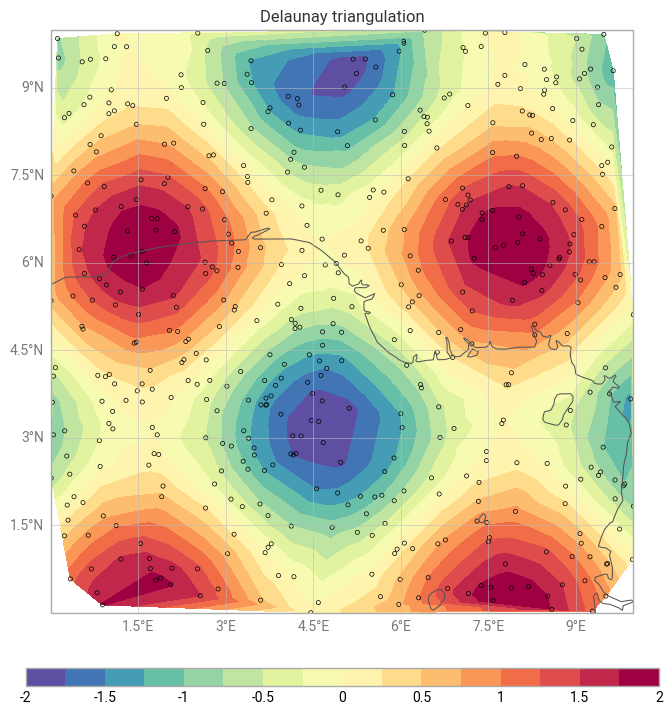

In [6]:
chart = earthkit.plots.Map()

chart.tricontourf(x=x, y=y, z=values, style=style)
chart.legend()

chart.scatter(x=points[:, 0], y=points[:, 1], color="none", marker=".")

chart.coastlines()
chart.gridlines()

chart.title("Delaunay triangulation")

chart.show()